#**IMPLEMENTACIÓN DEL ALGORITMO DE SIMPLEX ORIGINAL**

Carla Barbero, Sergio Copado, Enrique Esparcia, Rocío Frontaura

In [1]:
import numpy as np

def SimplexMatricial(A: np.array, b: np.array, c: np.array, var: np.array, verbose: bool=False, svm: bool=False):
    B = np.eye(len(b))                    # Matriz de bases B de tamaño igual al número de holguras del problema.
    A_original = A.copy()                 # Creamos dos copias de las matrices A, b y c ya que en pasos posteriores se necesitan las matrices originales y vamos a modificarlas.
    b_original = b.copy()
    c_original = -c.copy()
    var_original = var.copy()             # Variables alfabéticas para saber exáctamente qué variable tiene qué valor.
    base = var_original.copy()[-len(b):]  # Base alfabética para saber cuáles son las variables de la base.
    z = 0                                 # Variable en la que guardaremos la solución.
    c_b = np.zeros_like(b)                # Matriz de coeficientes de la base en la función objetivo.

    if verbose:
      it = 1
      print('Base inicial {'+', '.join(base)+'}')

    while np.any(c < 0):                                       # Condición de parada cuando todos los coeficietes de la matriz c son positivos.
        indice_mas_negativo = np.argmin(c)                     # Guardamos la posición del coeficiente de la matrix c más negativo.
        columna_encontrada = A[:, indice_mas_negativo]         # Guardamos la columna de la matriz A que se encuentra debajo del coeficiente c anterior.
        variable_entrada = A_original[:, indice_mas_negativo]  # Guardamos la misma información que en el paso anterior pero de la matriz A original para calcular después la matriz B.
        if verbose:
          print(f'Iteración {it}:')
          print(f'\tFunción objetivo: {list(c)}')
          print(f'\tVariable de entrada: {var_original[indice_mas_negativo]}')
          print(f'\tColumna de entrada: {list(columna_encontrada)}')

        idx_aux = [i for i in range(len(columna_encontrada)) if columna_encontrada[i] != 0.0]                     # Si existe algún cero, al quitarlo para que la división no de error es posible que los índices cambien por lo que guardamos dichos índices en una lista.

        division_result = np.divide(b[columna_encontrada != 0.0], columna_encontrada[columna_encontrada != 0.0])  # Realizamos la división de b entre la columna de A, anteriormente guardada, para hallar la variable de salida.

        if verbose:
          print('\tMínimo de {'+str(', '.join(list(str(b[i])+"/"+str(columna_encontrada[i]) for i in range(len(b)))))+'} -> ', np.min(division_result[division_result > 0]))

        idx_aux_2 = [i for i in range(len(division_result)) if division_result[i] > 0.0]
        posicion_variable_salida = np.argmin(division_result[division_result > 0.0])      # Guardamos la posición de la variable de salida con la condición de que sea el más pequeño pero positivo.
        posicion_variable_salida = idx_aux_2[posicion_variable_salida]
        posicion_variable_salida = idx_aux[posicion_variable_salida]
        if verbose:
          print(f'\tVariable de salida: {base[posicion_variable_salida]}')

        B[:, posicion_variable_salida] = variable_entrada                                 # Modificamos la matriz B, añadiéndole la 'variable_entrada' que es la columna de A original en la posición que hemos obtenido antes que ocupaba la 'variable_salida'.
        base[posicion_variable_salida] = var_original[indice_mas_negativo]

        c_b[posicion_variable_salida] = c_original[indice_mas_negativo]                   # Calculamos 'c_b'.




        order = [(list(var_original).index(base[i]), i) for i in range(len(base))]        # Ordenamos la base manteniendo el orden inicial de las variables.
        correct_order = sorted(order)
        # print(correct_order)
        B_aux = np.zeros_like(B)
        c_b_aux = np.zeros_like(c_b)
        base_aux = np.zeros_like(base)
        for i,base_var in enumerate(correct_order):
          B_aux[:,i] = B[:,base_var[1]]
          c_b_aux[i] = c_b[base_var[1]]
          base_aux[i] = base[base_var[1]]
        B = B_aux.copy()
        c_b = c_b_aux.copy()
        base = base_aux



        if verbose:
          print('\tColumnas de A en la base:')
          for e in B:
            print(f'\t{list(e)}')

        if verbose:
          print(f'\tCoeficientes de la función objetivo de la base: {list(c_b)}')


        inversa_B = np.linalg.inv(B)                                                      # Obtenemos la matriz inversa de B.
        A = np.round(inversa_B @ A_original, 10)
        # A[A == -0.0] = 0.0
        b = np.round(inversa_B @ b_original, 10)

        z = c_b @ inversa_B @ b_original
        # print(c_b, inversa_B, A_original, c_original)
        # print(c_original)
        c = np.round((c_b @ inversa_B @ A_original) - c_original, 10)
        # c[c == -0.0] = 0.0

        if verbose:
          print('\tBase al final de la iteración: {'+', '.join(base)+'}')
          print(f'\tFunción objetivo respecto a la nueva base: {list(c)}')
          print(f'\tValor actualizado de la función objetivo: {z}')
          it += 1

    if svm:
      return c

    return z, b, base                                                                   # Devolvemos los valores de z, b y de la base.

**EJEMPLOS DE USO DEL ALGORITMO**

In [2]:
# Ejemplo guiado de clase
var = np.array(['x1', 'x2', 's1', 's2'])
c = np.array([-5, -4, 0, 0])
A = np.array([[4, 2, 1, 0], [1, 1, 0, 1]])
b = np.array([8, 3])

optimal_value, optimal_solution, var_solution = SimplexMatricial(A, b, c, var, True)
print("Valor máximo:", optimal_value)
print("Argumentos del máximo:")
for i in range(len(optimal_solution)):
  print(f'\t{var_solution[i]} = {optimal_solution[i]}')

Base inicial {s1, s2}
Iteración 1:
	Función objetivo: [-5, -4, 0, 0]
	Variable de entrada: x1
	Columna de entrada: [4, 1]
	Mínimo de {8/4, 3/1} ->  2.0
	Variable de salida: s1
	Columnas de A en la base:
	[4.0, 0.0]
	[1.0, 1.0]
	Coeficientes de la función objetivo de la base: [5, 0]
	Base al final de la iteración: {x1, s2}
	Función objetivo respecto a la nueva base: [0.0, -1.5, 1.25, 0.0]
	Valor actualizado de la función objetivo: 10.0
Iteración 2:
	Función objetivo: [0.0, -1.5, 1.25, 0.0]
	Variable de entrada: x2
	Columna de entrada: [0.5, 0.5]
	Mínimo de {2.0/0.5, 1.0/0.5} ->  2.0
	Variable de salida: s2
	Columnas de A en la base:
	[4.0, 2.0]
	[1.0, 1.0]
	Coeficientes de la función objetivo de la base: [5, 4]
	Base al final de la iteración: {x1, x2}
	Función objetivo respecto a la nueva base: [0.0, 0.0, 0.5, 3.0]
	Valor actualizado de la función objetivo: 13.0
Valor máximo: 13.0
Argumentos del máximo:
	x1 = 1.0
	x2 = 2.0


In [3]:
# Ejemplo 3.2-1 taha
var = np.array(['x1', 'x2', 's1', 's2'])
c = np.array([-2, -3, 0, 0])
A = np.array([[2, 1, 1, 0], [1, 2, 0, 1]])
b = np.array([4, 5])

optimal_value, optimal_solution, var_solution = SimplexMatricial(A, b, c, var, True)
print("Valor máximo:", optimal_value)
print("Argumentos del máximo:")
for i in range(len(optimal_solution)):
  print(f'\t{var_solution[i]} = {optimal_solution[i]}')

Base inicial {s1, s2}
Iteración 1:
	Función objetivo: [-2, -3, 0, 0]
	Variable de entrada: x2
	Columna de entrada: [1, 2]
	Mínimo de {4/1, 5/2} ->  2.5
	Variable de salida: s2
	Columnas de A en la base:
	[1.0, 1.0]
	[2.0, 0.0]
	Coeficientes de la función objetivo de la base: [3, 0]
	Base al final de la iteración: {x2, s1}
	Función objetivo respecto a la nueva base: [-0.5, 0.0, 0.0, 1.5]
	Valor actualizado de la función objetivo: 7.5
Iteración 2:
	Función objetivo: [-0.5, 0.0, 0.0, 1.5]
	Variable de entrada: x1
	Columna de entrada: [0.5, 1.5]
	Mínimo de {2.5/0.5, 1.5/1.5} ->  1.0
	Variable de salida: s1
	Columnas de A en la base:
	[2.0, 1.0]
	[1.0, 2.0]
	Coeficientes de la función objetivo de la base: [2, 3]
	Base al final de la iteración: {x1, x2}
	Función objetivo respecto a la nueva base: [0.0, 0.0, 0.3333333333, 1.3333333333]
	Valor actualizado de la función objetivo: 8.0
Valor máximo: 8.0
Argumentos del máximo:
	x1 = 1.0
	x2 = 2.0


In [4]:
# Ejemplo de internet con solución
var = np.array(['x1', 'x2', 's1', 's2', 's3'])
c = np.array([-180, -90, 0, 0, 0])
A = np.array([[1, 0, 1, 0, 0], [0, 1, 0, 1, 0], [6, 8, 0, 0, 1]])
b = np.array([6, 4, 48])

optimal_value, optimal_solution, var_solution = SimplexMatricial(A, b, c, var, True)
print("Valor máximo:", optimal_value)
print("Argumentos del máximo:")
for i in range(len(optimal_solution)):
  print(f'\t{var_solution[i]} = {optimal_solution[i]}')

Base inicial {s1, s2, s3}
Iteración 1:
	Función objetivo: [-180, -90, 0, 0, 0]
	Variable de entrada: x1
	Columna de entrada: [1, 0, 6]
	Mínimo de {6/1, 4/0, 48/6} ->  6.0
	Variable de salida: s1
	Columnas de A en la base:
	[1.0, 0.0, 0.0]
	[0.0, 1.0, 0.0]
	[6.0, 0.0, 1.0]
	Coeficientes de la función objetivo de la base: [180, 0, 0]
	Base al final de la iteración: {x1, s2, s3}
	Función objetivo respecto a la nueva base: [0.0, -90.0, 180.0, 0.0, 0.0]
	Valor actualizado de la función objetivo: 1080.0
Iteración 2:
	Función objetivo: [0.0, -90.0, 180.0, 0.0, 0.0]
	Variable de entrada: x2
	Columna de entrada: [0.0, 1.0, 8.0]
	Mínimo de {6.0/0.0, 4.0/1.0, 12.0/8.0} ->  1.5
	Variable de salida: s3
	Columnas de A en la base:
	[1.0, 0.0, 0.0]
	[0.0, 1.0, 1.0]
	[6.0, 8.0, 0.0]
	Coeficientes de la función objetivo de la base: [180, 90, 0]
	Base al final de la iteración: {x1, x2, s2}
	Función objetivo respecto a la nueva base: [0.0, 0.0, 112.5, 0.0, 11.25]
	Valor actualizado de la función objetivo:

In [ ]:
# Ejemplo de internet con solución
var = np.array(['x1', 'x2', 's1', 's2', 's3'])
c = np.array([-5, -2, 0, 0, 0])
A = np.array([[3, 2, 1, 0, 0], [0, 1, 0, 1, 0], [2, 0, 0, 0, 1]])
b = np.array([2400, 800, 1200])

optimal_value, optimal_solution, var_solution = SimplexMatricial(A, b, c, var, True)
print("Valor máximo:", optimal_value)
print("Argumentos del máximo:")
for i in range(len(optimal_solution)):
  print(f'\t{var_solution[i]} = {optimal_solution[i]}')

Base inicial {s1, s2, s3}
Iteración 1:
	Función objetivo: [-5, -2, 0, 0, 0]
	Variable de entrada: x1
	Columna de entrada: [3, 0, 2]
	Mínimo de {2400/3, 800/0, 1200/2} ->  600.0
	Variable de salida: s3
	Columnas de A en la base:
	[3.0, 1.0, 0.0]
	[0.0, 0.0, 1.0]
	[2.0, 0.0, 0.0]
	Coeficientes de la función objetivo de la base: [5, 0, 0]
	Base al final de la iteración: {x1, s1, s2}
	Función objetivo respecto a la nueva base: [0.0, -2.0, 0.0, 0.0, 2.5]
	Valor actualizado de la función objetivo: 3000.0
Iteración 2:
	Función objetivo: [0.0, -2.0, 0.0, 0.0, 2.5]
	Variable de entrada: x2
	Columna de entrada: [0.0, 2.0, 1.0]
	Mínimo de {600.0/0.0, 600.0/2.0, 800.0/1.0} ->  300.0
	Variable de salida: s1
	Columnas de A en la base:
	[3.0, 2.0, 0.0]
	[0.0, 1.0, 1.0]
	[2.0, 0.0, 0.0]
	Coeficientes de la función objetivo de la base: [5, 2, 0]
	Base al final de la iteración: {x1, x2, s2}
	Función objetivo respecto a la nueva base: [0.0, 0.0, 1.0, 0.0, 1.0]
	Valor actualizado de la función objetivo: 3

In [ ]:
# Problema 3.2A taha
var = np.array(['x1', 'x2', 's1', 's2'])
c = np.array([-2, -3, 0, 0]).astype('float64')
A = np.array([[1, 3, 1, 0], [3, 2, 0, 1]]).astype('float64')
b = np.array([6, 6]).astype('float64')

optimal_value, optimal_solution, var_solution = SimplexMatricial(A, b, c, var, True)
print("Valor máximo:", optimal_value)
print("Argumentos del máximo:")
for i in range(len(optimal_solution)):
  print(f'\t{var_solution[i]} = {optimal_solution[i]}')

Base inicial {s1, s2}
Iteración 1:
	Función objetivo: [-2.0, -3.0, 0.0, 0.0]
	Variable de entrada: x2
	Columna de entrada: [3.0, 2.0]
	Mínimo de {6.0/3.0, 6.0/2.0} ->  2.0
	Variable de salida: s1
	Columnas de A en la base:
	[3.0, 0.0]
	[2.0, 1.0]
	Coeficientes de la función objetivo de la base: [3.0, 0.0]
	Base al final de la iteración: {x2, s2}
	Función objetivo respecto a la nueva base: [-1.0, 0.0, 1.0, 0.0]
	Valor actualizado de la función objetivo: 6.0
Iteración 2:
	Función objetivo: [-1.0, 0.0, 1.0, 0.0]
	Variable de entrada: x1
	Columna de entrada: [0.3333333333, 2.3333333333]
	Mínimo de {2.0/0.3333333333, 2.0/2.3333333333} ->  0.857142857155102
	Variable de salida: s2
	Columnas de A en la base:
	[1.0, 3.0]
	[3.0, 2.0]
	Coeficientes de la función objetivo de la base: [2.0, 3.0]
	Base al final de la iteración: {x1, x2}
	Función objetivo respecto a la nueva base: [-0.0, -0.0, 0.7142857143, 0.4285714286]
	Valor actualizado de la función objetivo: 6.857142857142856
Valor máximo: 6.85

#**IMPLEMENTACIÓN DE SVM**

In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets

# Como los datos son generados aleatoriamente los parametros que pide SVM son para la aleatorización y el peso de los errores.
def SVM(n_samples: int=100, n_dim: int=2, random_state: int=42, C: float=1.0, plot: bool=True, return_params: bool=True, input_data: bool=False, X: np.array=None, y: np.array=None):
  # Generarmos datos linealmente separables
  # Inicialmente, al ser datos binarios (dos conjuntos linealmente separables) las etiquetas se clasifican como 0 y 1. Sin embargo, el SVM necesita que sean -1 y 1 para funcionar correctamente.
  # Por ello aplicamos la fórmula a 'y' tal que:
  #  Si y = 0 -> y = 2*0 - 1 = -1
  #  Si y = 1 -> y = 2*1 - 1 = 1
  # Obteniendo así las etiquetas [-1,1].
  if not input_data:
    X, y = datasets.make_classification(n_samples=n_samples, n_features=n_dim, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=random_state)
    y = 2*y - 1
  else:
    n_samples = X.shape[0]
    n_dim = X.shape[1]

  # Inicializamos el problema primal. Creamos las matrices tal y como son en el problema original.
  c = np.ones(n_dim*2 + 2 + n_samples)    # Hacemos n_dim*2 ya que para cada w tenemos w+ y w-.
  c[:n_dim*2] /= 2
  c[n_dim*2:n_dim*2 + 2] = 0
  c[n_dim*2 + 2:] = C
  A = np.zeros((n_samples, n_dim*2 + 2 + n_samples))
  for i in range(n_samples):
    for j in range(n_dim):
      A[i, j*2] = y[i]*X[i, j]
      A[i, j*2 + 1] = -y[i]*X[i, j]
    A[i, n_dim*2] = y[i]
    A[i, n_dim*2 + 1] = -y[i]
    A[i, n_dim*2 + 2 + i] = 1

  b = np.ones(n_samples)

  # Pasamos al problema dual.
  A = A.T
  n_restric = A.shape[0]
  AD = np.zeros((n_restric, A.shape[1] + n_restric))
  AD[:n_restric, :A.shape[1]] = A

  for i in range(n_restric):
    AD[i, A.shape[1]+i] = 1

  b, c = c, b

  # Creamos la lista de variables del problema.
  var = np.array([])
  for i in range(A.shape[1]):
    var = np.append(var, np.array(['y'+str(i+1)]))
  for i in range(n_restric):
    var = np.append(var, np.array(['s'+str(i+1)]))
    c = np.append(c, np.array([0]))

  c = c * -1

  # Resolvemos mediante Símplex utilizando el algoritmo implementado anteriormente.
  c_sol = SimplexMatricial(AD, b, c, var, svm=True)

  # Calculamos la solución en el problema primal. Recuperamos los coeficientes de la función objetivo, donde los coeficientes de las s son la solución cambiada de signo del problema inicial.
  s1 = len(var) - n_restric
  w = []
  for i in range(n_dim):
    w.append(-c_sol[s1 + i*2] + c_sol[s1 + i*2 + 1])
  b = -c_sol[s1 + n_dim*2] + c_sol[s1 + n_dim*2 + 1]
  error = c_sol[s1 + n_dim*2 + 2:]                     # Calculamos el error.

  # Graficamos el problema en función del número de dimensiones de los datos.
  if plot:
    if n_dim == 2:
      xx = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
      if w[1] == 0:
        plt.axhline(b, label='Recta divisoria', linestyle='-', color='green')
        plt.axhline(b + 1, label='Vector de soporte clase 1', linestyle='--', color='green')
        plt.axhline(b - 1, label='Vector de soporte clase -1', linestyle='--', color='green')
      else:
        yy = (-w[0] / w[1]) * xx - b / w[1]
        sv1 = (-w[0] / w[1]) * xx + (-b + 1) / w[1]
        sv2 = (-w[0] / w[1]) * xx + (-b - 1) / w[1]
        plt.plot(xx, yy, label='Recta divisoria', linestyle='-', color='green')
        plt.plot(xx, sv1, label='Vector de soporte clase 1', linestyle='--', color='green')
        plt.plot(xx, sv2, label='Vector de soporte clase -1', linestyle='--', color='green')
      plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
      # plt.legend()
      plt.show()
    elif n_dim == 3:
      print(' ')
      xx = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
      yy = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
      xx, yy = np.meshgrid(xx, yy)

      if w[2] == 0:
        zz = np.full_like(xx, b)
        sv1 = np.full_like(xx, b + 1)
        sv1 = np.full_like(xx, b - 1)
      else:
        zz = (-w[0] / w[2]) * xx + (-w[1] / w[2]) * yy + (-b) / w[2]
        sv1 = (-w[0] / w[2]) * xx + (-w[1] / w[2]) * yy + (-b + 1) / w[2]
        sv2 = (-w[0] / w[2]) * xx + (-w[1] / w[2]) * yy + (-b - 1) / w[2]
        scatter = go.Scatter3d(x = X[:,0], y = X[:,1], z = X[:,2],mode = 'markers',marker = dict(size = 6,color = y,colorscale = 'rainbow',opacity = 0.8))
        sep_plane = go.Surface(x=xx, y=yy, z=zz, colorscale='Greens', opacity=0.9, showscale=False)
        sv1_plane = go.Surface(x=xx, y=yy, z=sv1, colorscale='Greens', opacity=0.4, showscale=False)
        sv2_plane = go.Surface(x=xx, y=yy, z=sv2, colorscale='Greens', opacity=0.4, showscale=False)
      fig = go.Figure(data=[scatter, sep_plane, sv1_plane, sv2_plane])

      fig.update_layout(scene = dict(
                            xaxis = dict(title='X'),
                            yaxis = dict(title='Y'),
                            zaxis = dict(title='Z')
                        ))
      fig.show()
    else:
      print(f'Imposible visualizar {n_dim} dimensiones')

  # Devolvemos el error los valores de w y b.
  if return_params:
    return w, b, error

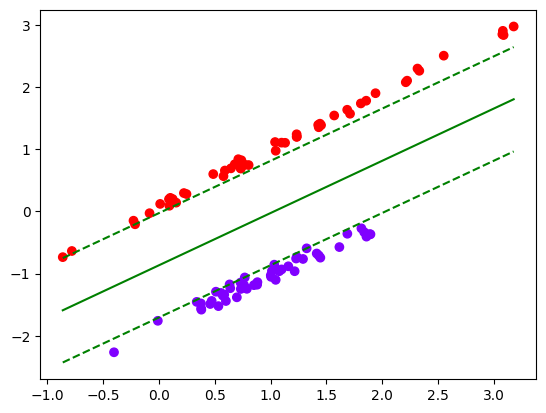

In [6]:
from time import time
# random_state 42: linealmente separable, 41: mezclado pero separable, 4: muy mezclado, C adquiere importancia
# 397 C alto separa alejando los conjuntos lo más posible pero con errores, C bajo separa por completo los dos conjuntos pero con poco margen
# y con menos divisón clara de grupo
SVM(random_state=42, C=1, return_params=False)

In [7]:
import plotly.graph_objects as go
X, y = datasets.make_classification(n_samples=10, n_features=3, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = 2*y - 1
SVM(X=X, y=y, input_data=True, C=0, return_params=True)

([0.0, 0.1414887197, -1.3894060247],
 -0.1203516981,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
from keras.datasets import mnist
# TARDA EN EJECTUTAR
(x_train, y_train), (x_test, y_test) = mnist.load_data()
indices_0_1 = (y_train == 0) | (y_train == 1)
x_train_01 = np.array(x_train[indices_0_1]).astype('float64').reshape(-1, 28*28) / 255.0
y_train_01 = np.array(y_train[indices_0_1]).astype('float64') / 255.0
y_train_01 = 2*y_train_01 - 1
indices_0_1_test = (y_test == 0) | (y_test == 1)
x_test_01 = np.array(x_test[indices_0_1_test]).astype('float64').reshape(-1, 28*28) / 255.0
y_test_01 = np.array(y_test[indices_0_1_test]).astype('float64') / 255.0
y_test_01 = 2*y_test_01 - 1


x_class_0 = x_train_01[y_train_01 == -1][:1000]
x_class_1 = x_train_01[y_train_01 == 1][:1000]

y_class_0 = y_train_01[y_train_01 == -1][:1000]
y_class_1 = y_train_01[y_train_01 == 1][:1000]
# Crear un nuevo conjunto de datos con las muestras seleccionadas
x_selected = np.concatenate([x_class_0, x_class_1])
y_selected = np.concatenate([y_class_0, y_class_1])

w, b, error = SVM(X=x_selected, y=y_selected, input_data=True, C=1, return_params=True, plot=False)